In [1]:
import os
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torchvision

In [2]:
# Load training features
cond7 = torch.load('combined_cond7.pt')
cond10 = torch.load('combined_cond10.pt')

# Load training features
ex7 = torch.load('combined_ex7.pt')
ex10 = torch.load('combined_ex10.pt')
# Load training features
sd7 = torch.load('combined_sd7.pt')
sd10 = torch.load('combined_sd10.pt')

C:\Users\k54739\AppData\Local\Temp\ipykernel_12224\1147718468.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cond7 = torch.load('combined_cond7.pt')
C:\Users\k54739\App

In [3]:
print(cond7.shape)
print(cond10.shape)

print(sd7.shape)
print(sd10.shape)

print(ex7.shape)
print(ex10.shape)

torch.Size([650, 20])
torch.Size([650, 20])
torch.Size([638, 20])
torch.Size([638, 20])
torch.Size([646, 20])
torch.Size([646, 20])


In [4]:
import joblib
# Load the scalers from disk
scaler_day7 = joblib.load('ex7.pkl')
scaler_day10 = joblib.load('ex10.pkl')

print("Scalers loaded!")

Scalers loaded!


print(sd7.shape)
print(sd10.shape)

In [ ]:
import joblib
# Load the scalers from disk
scaler_day7 = joblib.load('sd7.pkl')
scaler_day10 = joblib.load('sd10.pkl')

print("Scalers loaded!")

In [ ]:
import joblib
# Load the scalers from disk
scaler_day7 = joblib.load('cond7.pkl')
scaler_day10 = joblib.load('cond10.pkl')

print("Scalers loaded!")

In [5]:
import torch
from sklearn.preprocessing import MinMaxScaler

def scale_tensor(scaler, tensor):
    """
    Scales a tensor using the provided MinMaxScaler.

    Args:
        scaler (MinMaxScaler): The MinMaxScaler to use for scaling.
        tensor (torch.Tensor): The tensor to scale.

    Returns:
        torch.Tensor: The scaled tensor.
    """
    tensor_numpy = tensor.numpy()  # Convert tensor to numpy
    tensor_scaled_numpy = scaler.transform(tensor_numpy)  # Apply Min-Max scaling
    tensor_scaled = torch.tensor(tensor_scaled_numpy)  # Convert back to torch tensor
    return tensor_scaled




In [6]:
# Example usage for different datasets


cond7_minmax = scale_tensor(scaler_day7, cond7)
cond10_minmax = scale_tensor(scaler_day10, cond10)

ex7_minmax = scale_tensor(scaler_day7, ex7)
ex10_minmax = scale_tensor(scaler_day10, ex10)

sd7_minmax = scale_tensor(scaler_day7, sd7)
sd10_minmax = scale_tensor(scaler_day10, sd10)

In [7]:
# Set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
import torch
import torch.nn as nn

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=20, output_size=20):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
    
    def forward(self, x):
        x = self.encoder(x)
        z = self.decoder(x)
        return z

# Example usage
model = FeaturePredictor()
print(model)


FeaturePredictor(
  (encoder): Sequential(
    (0): Linear(in_features=20, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=8, out_features=4, bias=True)
    (9): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=16, bias=True)
    (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=20, b

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    # Corrected indentation for forward method
    def forward(self, x):
        x = self.encoder(x)
        z = self.decoder(x)
        return z

import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)

In [9]:
# Define the directory where models are saved
#load_dir = r'C:\Users\k54739\saved_model\ranking\simclr\minmax_scaled'

# Load a specific fold's best model
model = FeaturePredictor()
load_path = os.path.join('bestmodel_ex_1.pth')
model.load_state_dict(torch.load(load_path))
model.to(device)
model.eval()

print(f"Loaded model from {load_path}")

Loaded model from bestmodel_ex_1.pth


C:\Users\k54739\AppData\Local\Temp\ipykernel_12224\3015219247.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(load_path))


# all metrics added:

In [10]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
train_day7_feats_minmaxed = sd7_minmax.to(device)
train_day10_feats_minmaxed = sd10_minmax.to(device)

# Initialize the MSE loss function
mse_loss_fn = nn.MSELoss()

# Lists to store metrics for each feature vector
mse_values = []
euclidean_distances = []
cosine_distances = []
l1_distances = []
pearson_correlations = []
dot_products = []
jaccard_similarities = []
hamming_distances = []
mahalanobis_distances = []

# Compute covariance matrix for Mahalanobis distance (for day10 features)
epsilon = 1e-6  # Stabilization constant for invertibility
mean_vector = torch.mean(train_day10_feats_minmaxed, dim=0)  # Mean vector
covariance_matrix = torch.cov(train_day10_feats_minmaxed.T)  # Covariance matrix
covariance_matrix += torch.eye(covariance_matrix.size(0), device=device) * epsilon  # Stabilize
covariance_matrix_inv = torch.inverse(covariance_matrix)  # Inverse covariance matrix

# Loop through each feature vector
for i in range(train_day7_feats_minmaxed.shape[0]):
    train_day7_feats = train_day7_feats_minmaxed[i].unsqueeze(0)  # Shape: [1, 512]
    train_day10_feats = train_day10_feats_minmaxed[i].unsqueeze(0)  # Shape: [1, 512]
    
    # Get prediction
    with torch.no_grad():
        predicted_day10 = model(train_day7_feats)
    
    # Compute MSE for this feature vector
    mse = mse_loss_fn(predicted_day10, train_day10_feats).item()
    mse_values.append(mse)
    
    # Compute Euclidean distance
    euclidean_distance = torch.norm(predicted_day10 - train_day10_feats, p=2).item()
    euclidean_distances.append(euclidean_distance)
    
    # Compute Cosine distance
    cosine_distance = 1 - F.cosine_similarity(predicted_day10, train_day10_feats, dim=1).item()
    cosine_distances.append(cosine_distance)
    
    # Compute L1 distance
    l1_distance = torch.norm(predicted_day10 - train_day10_feats, p=1).item()
    l1_distances.append(l1_distance)
    
    # Compute Pearson Correlation
    combined = torch.stack((predicted_day10.flatten(), train_day10_feats.flatten()), dim=0)  # Shape: [2, N]
    pearson_corr_matrix = torch.corrcoef(combined)  # Correlation matrix of shape [2, 2]
    pearson_corr = pearson_corr_matrix[0, 1]  # Extract correlation between the two variables
    pearson_correlations.append(pearson_corr.item())
    
    # Compute Inner Product (Dot Product)
    dot_product = torch.dot(predicted_day10.flatten(), train_day10_feats.flatten()).item()
    dot_products.append(dot_product)
    
    # Compute Jaccard Similarity (thresholding features to binary)
    bin_pred = (predicted_day10.flatten() > 0.5).int()
    bin_true = (train_day10_feats.flatten() > 0.5).int()
    intersection = (bin_pred & bin_true).sum().item()
    union = (bin_pred | bin_true).sum().item()
    jaccard_similarity = intersection / union if union > 0 else 0
    jaccard_similarities.append(jaccard_similarity)
    
    # Compute Hamming Distance (binary representation)
    hamming_distance = (bin_pred != bin_true).sum().item()
    hamming_distances.append(hamming_distance)
    
    # Compute Mahalanobis Distance
    delta = (predicted_day10.flatten() - mean_vector)  # Difference from mean
    mahalanobis_distance = torch.sqrt(torch.dot(delta, torch.matmul(covariance_matrix_inv, delta))).item()
    mahalanobis_distances.append(mahalanobis_distance)


# Print some example metrics for the first feature vector
print(f"Example metrics for the first feature vector:")
print(f"MSE: {mse_values[0]:.4f}")
print(f"Euclidean Distance: {euclidean_distances[0]:.4f}")
print(f"Cosine Distance: {cosine_distances[0]:.4f}")
print(f"L1 Distance: {l1_distances[0]:.4f}")
print(f"Pearson Correlation: {pearson_correlations[0]:.4f}")
print(f"Dot Product: {dot_products[0]:.4f}")
print(f"Jaccard Similarity: {jaccard_similarities[0]:.4f}")
print(f"Hamming Distance: {hamming_distances[0]:.4f}")
print(f"Mahalanobis Distance: {mahalanobis_distances[0]:.4f}")


Example metrics for the first feature vector:
MSE: 0.1656
Euclidean Distance: 1.8199
Cosine Distance: 0.1115
L1 Distance: 6.9295
Pearson Correlation: 0.4080
Dot Product: 6.7798
Jaccard Similarity: 0.4375
Hamming Distance: 9.0000
Mahalanobis Distance: 17.8845


In [11]:
import pandas as pd

# Create a DataFrame with all the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances,  # List of Cosine distances
    "L1 Distance": l1_distances,  # List of L1 distances
    "Pearson Correlation": pearson_correlations,  # List of Pearson correlation values
    "Dot Product": dot_products,  # List of dot product values
    "Jaccard Similarity": jaccard_similarities,  # List of Jaccard similarities
    "Hamming Distance": hamming_distances,  # List of Hamming distances
    "Mahalanobis Distance": mahalanobis_distances  # List of Mahalanobis distances
}

# Convert the data dictionary into a DataFrame
df = pd.DataFrame(data)

# Specify the desired name for the CSV file
#csv_file_name = "conorm_sd.csv" 

#csv_file_name = "sdnorm_sd.csv" 

csv_file_name = "exnorm_sd.csv" 




# Save the DataFrame to a CSV file
df.to_csv(csv_file_name, index=False)  # Save without an index column
print(f"All metrics saved to {csv_file_name}")


All metrics saved to exnorm_sd.csv


In [12]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
train_day7_feats_minmaxed = cond7_minmax.to(device)
train_day10_feats_minmaxed = cond10_minmax.to(device)

# Initialize the MSE loss function
mse_loss_fn = nn.MSELoss()

# Lists to store metrics for each feature vector
mse_values = []
euclidean_distances = []
cosine_distances = []
l1_distances = []
pearson_correlations = []
dot_products = []
jaccard_similarities = []
hamming_distances = []
mahalanobis_distances = []

# Compute covariance matrix for Mahalanobis distance (for day10 features)
epsilon = 1e-6  # Stabilization constant for invertibility
mean_vector = torch.mean(train_day10_feats_minmaxed, dim=0)  # Mean vector
covariance_matrix = torch.cov(train_day10_feats_minmaxed.T)  # Covariance matrix
covariance_matrix += torch.eye(covariance_matrix.size(0), device=device) * epsilon  # Stabilize
covariance_matrix_inv = torch.inverse(covariance_matrix)  # Inverse covariance matrix

# Loop through each feature vector
for i in range(train_day7_feats_minmaxed.shape[0]):
    train_day7_feats = train_day7_feats_minmaxed[i].unsqueeze(0)  # Shape: [1, 512]
    train_day10_feats = train_day10_feats_minmaxed[i].unsqueeze(0)  # Shape: [1, 512]
    
    # Get prediction
    with torch.no_grad():
        predicted_day10 = model(train_day7_feats)
    
    # Compute MSE for this feature vector
    mse = mse_loss_fn(predicted_day10, train_day10_feats).item()
    mse_values.append(mse)
    
    # Compute Euclidean distance
    euclidean_distance = torch.norm(predicted_day10 - train_day10_feats, p=2).item()
    euclidean_distances.append(euclidean_distance)
    
    # Compute Cosine distance
    cosine_distance = 1 - F.cosine_similarity(predicted_day10, train_day10_feats, dim=1).item()
    cosine_distances.append(cosine_distance)
    
    # Compute L1 distance
    l1_distance = torch.norm(predicted_day10 - train_day10_feats, p=1).item()
    l1_distances.append(l1_distance)
    
    # Compute Pearson Correlation
    combined = torch.stack((predicted_day10.flatten(), train_day10_feats.flatten()), dim=0)  # Shape: [2, N]
    pearson_corr_matrix = torch.corrcoef(combined)  # Correlation matrix of shape [2, 2]
    pearson_corr = pearson_corr_matrix[0, 1]  # Extract correlation between the two variables
    pearson_correlations.append(pearson_corr.item())
    
    # Compute Inner Product (Dot Product)
    dot_product = torch.dot(predicted_day10.flatten(), train_day10_feats.flatten()).item()
    dot_products.append(dot_product)
    
    # Compute Jaccard Similarity (thresholding features to binary)
    bin_pred = (predicted_day10.flatten() > 0.5).int()
    bin_true = (train_day10_feats.flatten() > 0.5).int()
    intersection = (bin_pred & bin_true).sum().item()
    union = (bin_pred | bin_true).sum().item()
    jaccard_similarity = intersection / union if union > 0 else 0
    jaccard_similarities.append(jaccard_similarity)
    
    # Compute Hamming Distance (binary representation)
    hamming_distance = (bin_pred != bin_true).sum().item()
    hamming_distances.append(hamming_distance)
    
    # Compute Mahalanobis Distance
    delta = (predicted_day10.flatten() - mean_vector)  # Difference from mean
    mahalanobis_distance = torch.sqrt(torch.dot(delta, torch.matmul(covariance_matrix_inv, delta))).item()
    mahalanobis_distances.append(mahalanobis_distance)


# Print some example metrics for the first feature vector
print(f"Example metrics for the first feature vector:")
print(f"MSE: {mse_values[0]:.4f}")
print(f"Euclidean Distance: {euclidean_distances[0]:.4f}")
print(f"Cosine Distance: {cosine_distances[0]:.4f}")
print(f"L1 Distance: {l1_distances[0]:.4f}")
print(f"Pearson Correlation: {pearson_correlations[0]:.4f}")
print(f"Dot Product: {dot_products[0]:.4f}")
print(f"Jaccard Similarity: {jaccard_similarities[0]:.4f}")
print(f"Hamming Distance: {hamming_distances[0]:.4f}")
print(f"Mahalanobis Distance: {mahalanobis_distances[0]:.4f}")


Example metrics for the first feature vector:
MSE: 0.0830
Euclidean Distance: 1.2881
Cosine Distance: 0.1458
L1 Distance: 4.2985
Pearson Correlation: -0.0545
Dot Product: 4.7994
Jaccard Similarity: 0.2308
Hamming Distance: 10.0000
Mahalanobis Distance: 8.8101


In [13]:
import pandas as pd

# Create a DataFrame with all the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances,  # List of Cosine distances
    "L1 Distance": l1_distances,  # List of L1 distances
    "Pearson Correlation": pearson_correlations,  # List of Pearson correlation values
    "Dot Product": dot_products,  # List of dot product values
    "Jaccard Similarity": jaccard_similarities,  # List of Jaccard similarities
    "Hamming Distance": hamming_distances,  # List of Hamming distances
    "Mahalanobis Distance": mahalanobis_distances  # List of Mahalanobis distances
}

# Convert the data dictionary into a DataFrame
df = pd.DataFrame(data)


#csv_file_name = "conorm_cond.csv"

#csv_file_name = "sdnorm_cond.csv"

csv_file_name = "exnorm_cond.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file_name, index=False)  # Save without an index column
print(f"All metrics saved to {csv_file_name}")


All metrics saved to exnorm_cond.csv


In [1]:
# ex

In [14]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

# Assume exploded40_day7_minmaxed and exploded40_day10_minmaxed are already loaded
# Example shapes: [N, 512], where N is the number of feature vectors

# Ensure the tensors are on the same device as the model
train_day7_feats_minmaxed = ex7_minmax.to(device)
train_day10_feats_minmaxed = ex10_minmax.to(device)

# Initialize the MSE loss function
mse_loss_fn = nn.MSELoss()

# Lists to store metrics for each feature vector
mse_values = []
euclidean_distances = []
cosine_distances = []
l1_distances = []
pearson_correlations = []
dot_products = []
jaccard_similarities = []
hamming_distances = []
mahalanobis_distances = []

# Compute covariance matrix for Mahalanobis distance (for day10 features)
epsilon = 1e-6  # Stabilization constant for invertibility
mean_vector = torch.mean(train_day10_feats_minmaxed, dim=0)  # Mean vector
covariance_matrix = torch.cov(train_day10_feats_minmaxed.T)  # Covariance matrix
covariance_matrix += torch.eye(covariance_matrix.size(0), device=device) * epsilon  # Stabilize
covariance_matrix_inv = torch.inverse(covariance_matrix)  # Inverse covariance matrix

# Loop through each feature vector
# Loop through each feature vector
for i in range(train_day7_feats_minmaxed.shape[0]):
    train_day7_feats = train_day7_feats_minmaxed[i].unsqueeze(0)  # Shape: [1, 512]
    train_day10_feats = train_day10_feats_minmaxed[i].unsqueeze(0)  # Shape: [1, 512]
    
    # Get prediction
    with torch.no_grad():
        predicted_day10 = model(train_day7_feats)
    
    # Compute MSE for this feature vector
    mse = mse_loss_fn(predicted_day10, train_day10_feats).item()
    mse_values.append(mse)
    
    # Compute Euclidean distance
    euclidean_distance = torch.norm(predicted_day10 - train_day10_feats, p=2).item()
    euclidean_distances.append(euclidean_distance)
    
    # Compute Cosine distance
    cosine_distance = 1 - F.cosine_similarity(predicted_day10, train_day10_feats, dim=1).item()
    cosine_distances.append(cosine_distance)
    
    # Compute L1 distance
    l1_distance = torch.norm(predicted_day10 - train_day10_feats, p=1).item()
    l1_distances.append(l1_distance)
    
    # Compute Pearson Correlation
    combined = torch.stack((predicted_day10.flatten(), train_day10_feats.flatten()), dim=0)  # Shape: [2, N]
    pearson_corr_matrix = torch.corrcoef(combined)  # Correlation matrix of shape [2, 2]
    pearson_corr = pearson_corr_matrix[0, 1]  # Extract correlation between the two variables
    pearson_correlations.append(pearson_corr.item())
    
    # Compute Inner Product (Dot Product)
    dot_product = torch.dot(predicted_day10.flatten(), train_day10_feats.flatten()).item()
    dot_products.append(dot_product)
    
    # Compute Jaccard Similarity (thresholding features to binary)
    bin_pred = (predicted_day10.flatten() > 0.5).int()
    bin_true = (train_day10_feats.flatten() > 0.5).int()
    intersection = (bin_pred & bin_true).sum().item()
    union = (bin_pred | bin_true).sum().item()
    jaccard_similarity = intersection / union if union > 0 else 0
    jaccard_similarities.append(jaccard_similarity)
    
    # Compute Hamming Distance (binary representation)
    hamming_distance = (bin_pred != bin_true).sum().item()
    hamming_distances.append(hamming_distance)
    
    # Compute Mahalanobis Distance
    delta = (predicted_day10.flatten() - mean_vector)  # Difference from mean
    mahalanobis_distance = torch.sqrt(torch.dot(delta, torch.matmul(covariance_matrix_inv, delta))).item()
    mahalanobis_distances.append(mahalanobis_distance)

# Print some example metrics for the first feature vector
print(f"Example metrics for the first feature vector:")
print(f"MSE: {mse_values[0]:.4f}")
print(f"Euclidean Distance: {euclidean_distances[0]:.4f}")
print(f"Cosine Distance: {cosine_distances[0]:.4f}")
print(f"L1 Distance: {l1_distances[0]:.4f}")
print(f"Pearson Correlation: {pearson_correlations[0]:.4f}")
print(f"Dot Product: {dot_products[0]:.4f}")
print(f"Jaccard Similarity: {jaccard_similarities[0]:.4f}")
print(f"Hamming Distance: {hamming_distances[0]:.4f}")
print(f"Mahalanobis Distance: {mahalanobis_distances[0]:.4f}")


Example metrics for the first feature vector:
MSE: 0.0105
Euclidean Distance: 0.4593
Cosine Distance: 0.0174
L1 Distance: 1.5944
Pearson Correlation: 0.9210
Dot Product: 5.1506
Jaccard Similarity: 0.8000
Hamming Distance: 2.0000
Mahalanobis Distance: 2.5921


In [15]:
import pandas as pd

# Create a DataFrame with all the metrics
data = {
    "MSE": mse_values,  # List of MSE values
    "Euclidean Distance": euclidean_distances,  # List of Euclidean distances
    "Cosine Distance": cosine_distances,  # List of Cosine distances
    "L1 Distance": l1_distances,  # List of L1 distances
    "Pearson Correlation": pearson_correlations,  # List of Pearson correlation values
    "Dot Product": dot_products,  # List of dot product values
    "Jaccard Similarity": jaccard_similarities,  # List of Jaccard similarities
    "Hamming Distance": hamming_distances,  # List of Hamming distances
    "Mahalanobis Distance": mahalanobis_distances  # List of Mahalanobis distances
}

# Convert the data dictionary into a DataFrame
df = pd.DataFrame(data)

# Specify the desired name for the CSV file
#csv_file_name = "conorm_ex.csv" 

#csv_file_name = "sdnorm_ex.csv" 

csv_file_name = "exnorm_ex.csv" 

# Save the DataFrame to a CSV file
df.to_csv(csv_file_name, index=False)  # Save without an index column
print(f"All metrics saved to {csv_file_name}")


All metrics saved to exnorm_ex.csv


In [16]:
import pandas as pd
import numpy as np

# Load datasets
"""datasets = {
    "explod": pd.read_csv("conorm_ex.csv"),
    "sd": pd.read_csv("conorm_sd.csv"),
    "control": pd.read_csv("conorm_cond.csv")
}"""

datasets = {
    "explod": pd.read_csv("exnorm_ex.csv"),
    "sd": pd.read_csv("exnorm_sd.csv"),
    "control": pd.read_csv("exnorm_cond.csv")
}

"""datasets = {
    "explod": pd.read_csv("sdnorm_ex.csv"),
    "sd": pd.read_csv("sdnorm_sd.csv"),
    "control": pd.read_csv("sdnorm_cond.csv")
}"""

# Prepare all metrics
metrics = [
    "MSE",
    "Euclidean Distance",
    "Cosine Distance",
    "L1 Distance",
    "Pearson Correlation",
    "Dot Product",
    "Jaccard Similarity",
    "Hamming Distance",
    "Mahalanobis Distance"
]

# Accuracy calculation function
def calculate_accuracy(datasets, metric_name):
    # Step 1: Calculate mean inference metric for each class
    class_means = {}
    for class_name, df in datasets.items():
        if metric_name in df.columns:
            class_means[class_name] = df[metric_name].mean()

    # Sort class means to find the middle class
    sorted_means = sorted(class_means.items(), key=lambda x: x[1])
    middle_class = sorted_means[1][0]  # The middle class is the second one in sorted order
    middle_class_mean = sorted_means[1][1]

    # Step 2: Find the min and max for the middle class
    middle_class_min = datasets[middle_class][metric_name].min()
    middle_class_max = datasets[middle_class][metric_name].max()

    # Step 3: Calculate errors
    error_1 = sum(datasets[sorted_means[0][0]][metric_name] > middle_class_min)
    error_3 = sum(datasets[sorted_means[2][0]][metric_name] < middle_class_max)
    total_errors = error_1 + error_3

    # Step 4: Calculate accuracy
    total_points = sum(len(df) for df in datasets.values())
    accuracy = (total_points - total_errors) / total_points

    # Print results
    print(f"Metric: {metric_name}")
    print(f"  Class Means: {class_means}")
    print(f"  Middle Class: {middle_class} (Mean: {middle_class_mean})")
    print(f"  Middle Class Min: {middle_class_min}, Max: {middle_class_max}")
    print(f"  Errors (C1 > min): {error_1}, Errors (C3 < max): {error_3}")
    print(f"  Total Errors: {total_errors}")
    print(f"  Accuracy: {accuracy:.4f}\n")

    return accuracy

# Calculate and print accuracy for each metric
results = {}
for metric in metrics:
    results[metric] = calculate_accuracy(datasets, metric)

# Summary of accuracies
print("\nSummary of Accuracies:")
for metric, acc in results.items():
    print(f"{metric}: {acc:.4f}")


Metric: MSE
  Class Means: {'explod': 0.026038585441553165, 'sd': 0.13008864350079738, 'control': 0.10640182491965014}
  Middle Class: control (Mean: 0.10640182491965014)
  Middle Class Min: 0.0295828133821487, Max: 0.3282394707202911
  Errors (C1 > min): 205, Errors (C3 < max): 638
  Total Errors: 843
  Accuracy: 0.5641

Metric: Euclidean Distance
  Class Means: {'explod': 0.6931444827248069, 'sd': 1.5981344150898973, 'control': 1.4282232672434587}
  Middle Class: control (Mean: 1.4282232672434587)
  Middle Class Min: 0.7691919803619385, Max: 2.5621845722198486
  Errors (C1 > min): 205, Errors (C3 < max): 638
  Total Errors: 843
  Accuracy: 0.5641

Metric: Cosine Distance
  Class Means: {'explod': 0.04195625014349399, 'sd': 0.15001185457908242, 'control': 0.17047518665973954}
  Middle Class: sd (Mean: 0.15001185457908242)
  Middle Class Min: 0.0801252126693725, Max: 0.317264199256897
  Errors (C1 > min): 48, Errors (C3 < max): 642
  Total Errors: 690
  Accuracy: 0.6432

Metric: L1 Dis

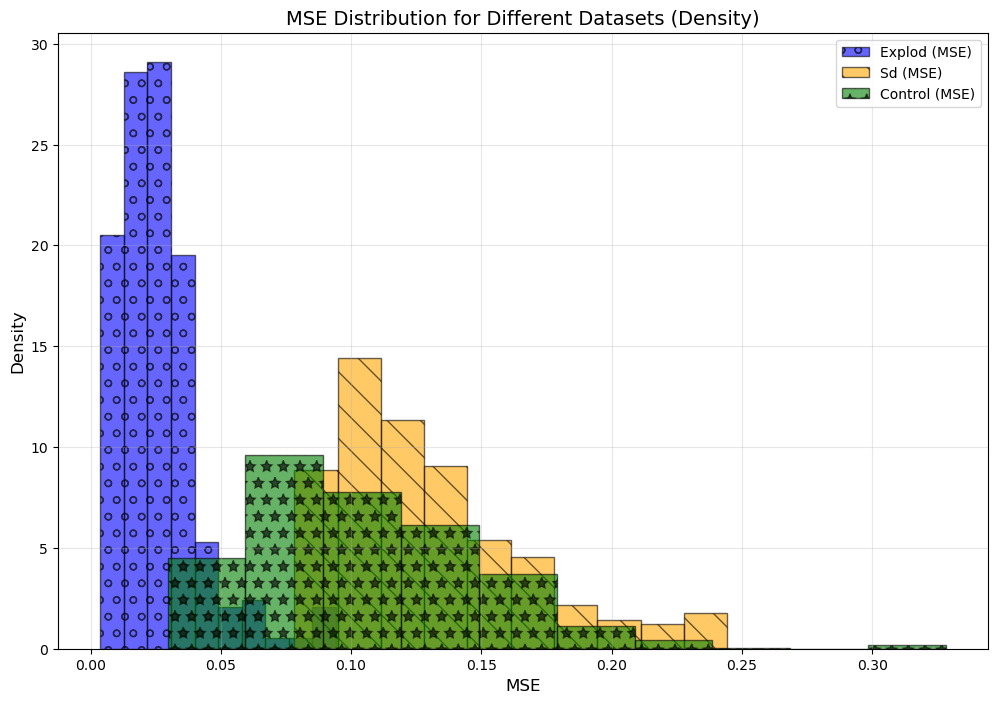

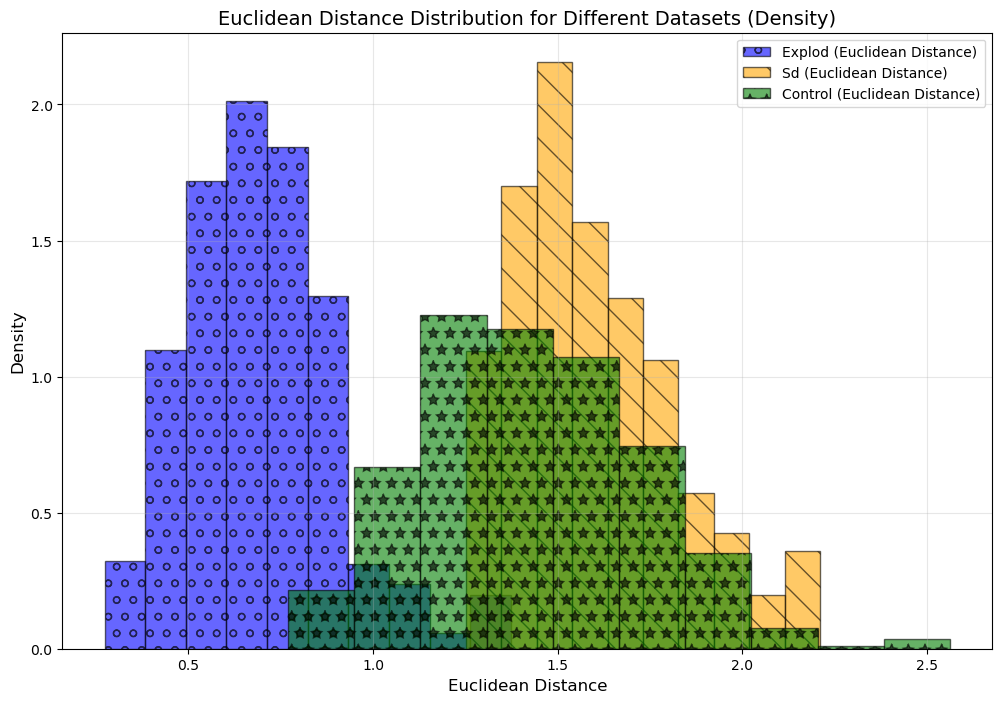

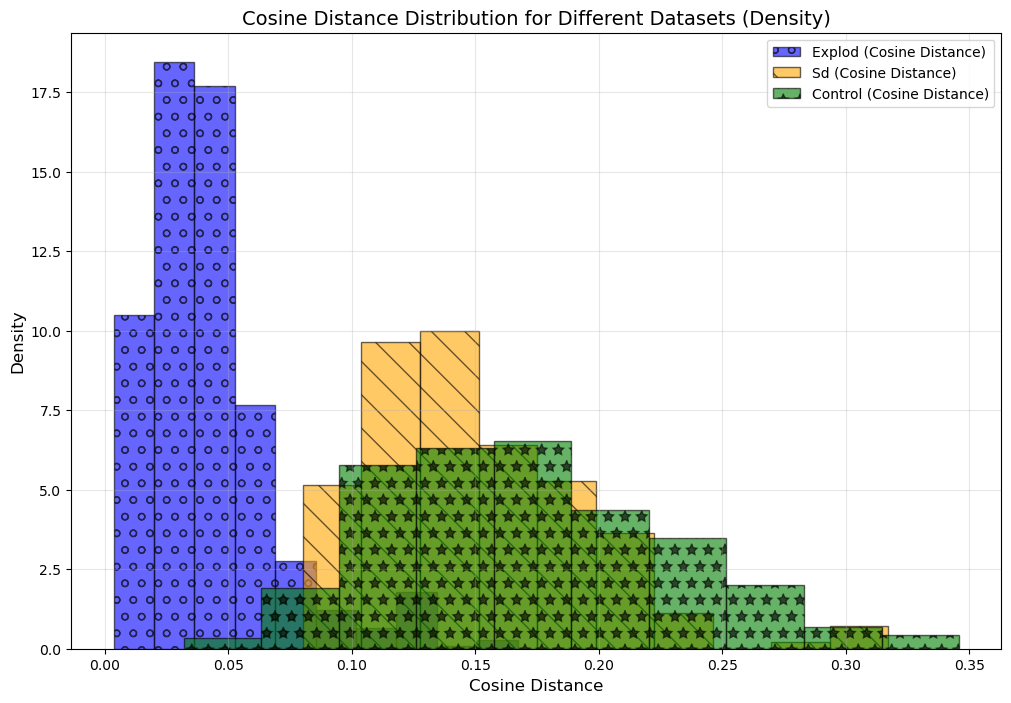

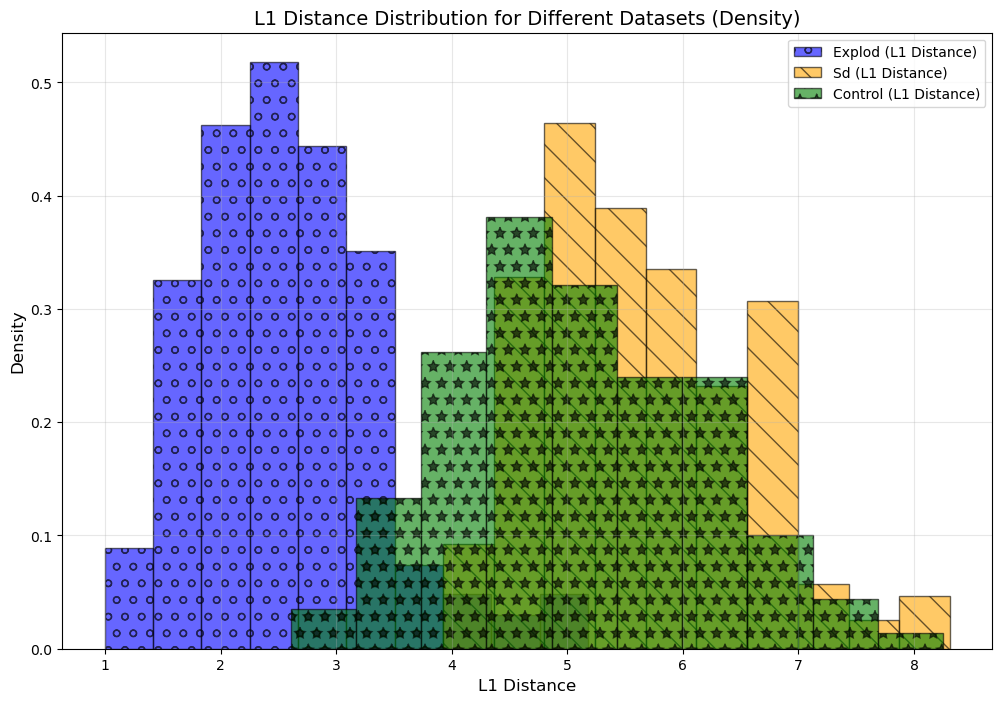

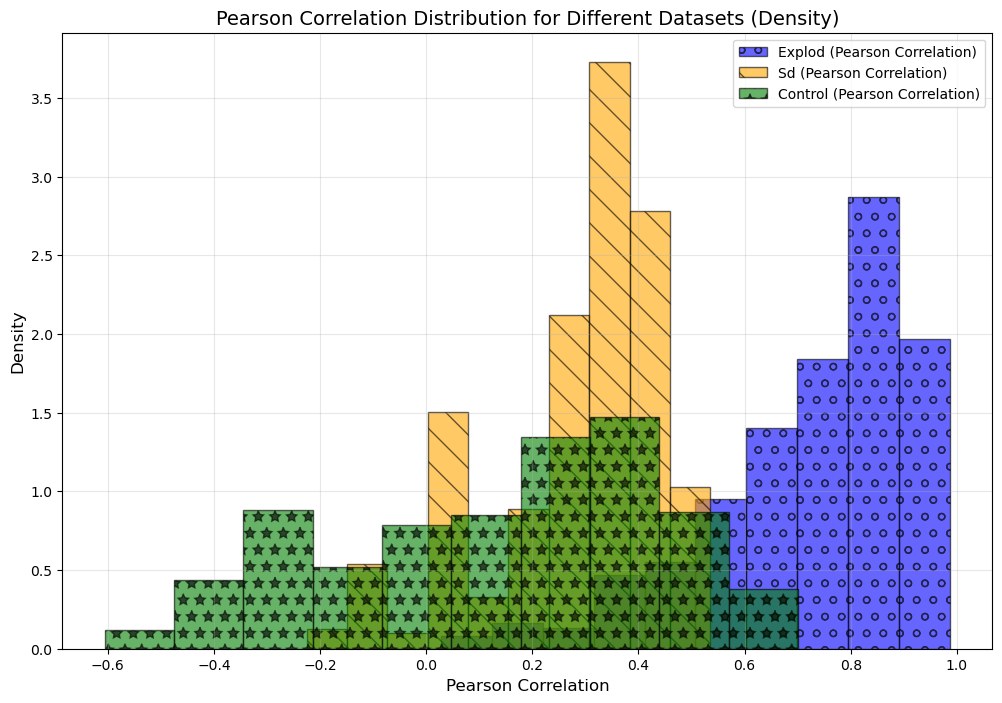

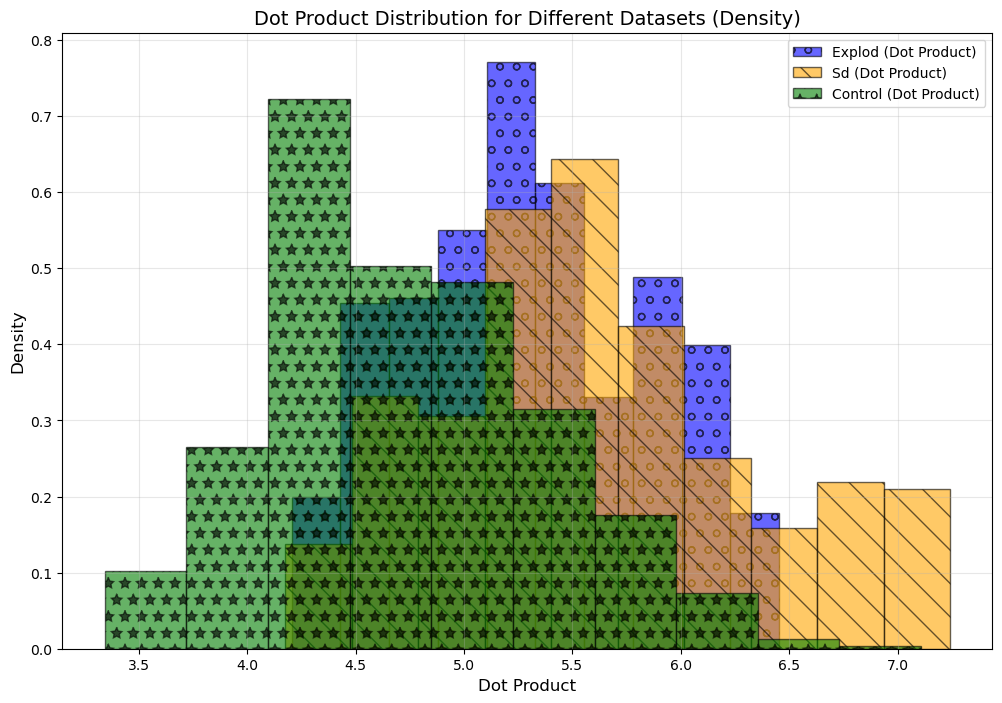

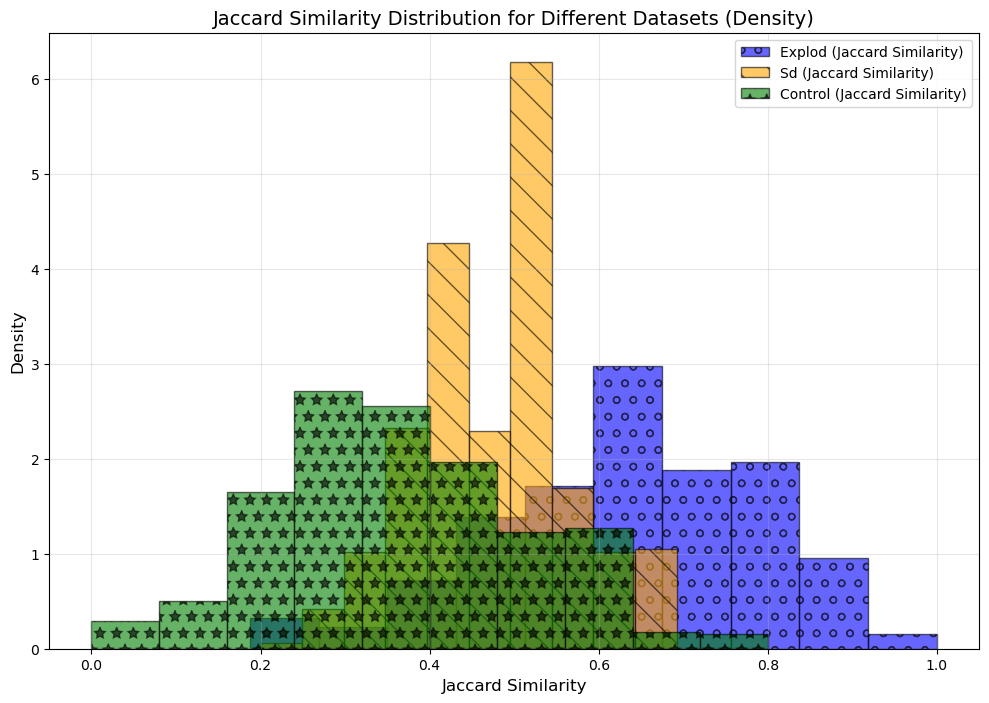

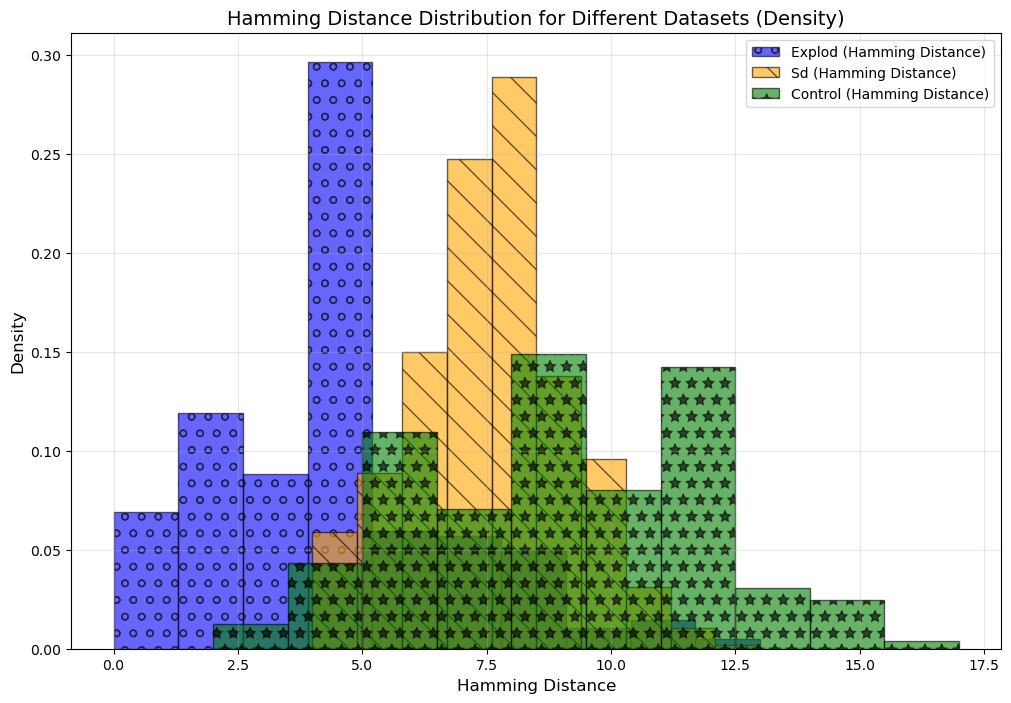

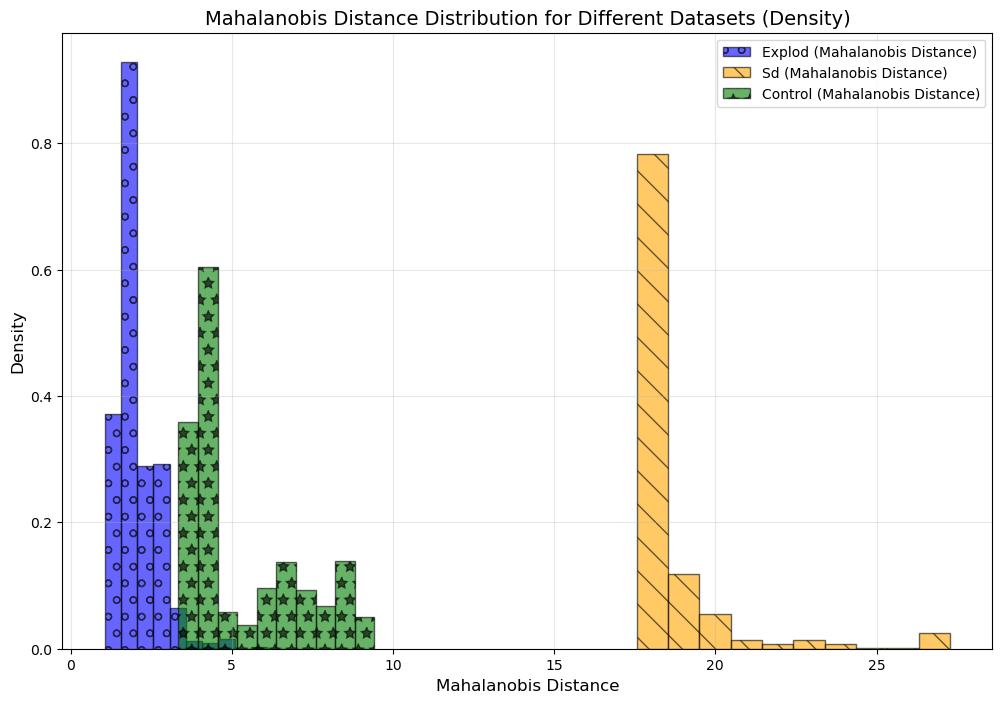

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Load datasets
# Load datasets
"""datasets = {
    "explod": pd.read_csv("conorm_ex.csv"),
    "sd": pd.read_csv("conorm_sd.csv"),
    "control": pd.read_csv("conorm_cond.csv")
}"""

datasets = {
    "explod": pd.read_csv("exnorm_ex.csv"),
    "sd": pd.read_csv("exnorm_sd.csv"),
    "control": pd.read_csv("exnorm_cond.csv")
}

"""datasets = {
    "explod": pd.read_csv("sdnorm_ex.csv"),
    "sd": pd.read_csv("sdnorm_sd.csv"),
    "control": pd.read_csv("sdnorm_cond.csv")
}"""


# Prepare all metrics
metrics = [
    "MSE",
    "Euclidean Distance",
    "Cosine Distance",
    "L1 Distance",
    "Pearson Correlation",
    "Dot Product",
    "Jaccard Similarity",
    "Hamming Distance",
    "Mahalanobis Distance"
]

# Define colors and hatching patterns for each dataset
colors = {"explod": "blue", "sd": "orange", "control": "green"}
hatch_styles = {"explod": "o", "sd": "\\", "control": "*"}

# Plotting function
def plot_metric_distribution(metric_name, bins=20):
    plt.figure(figsize=(12, 8))
    
    # Plot each dataset
    for dataset_name, df in datasets.items():
        if metric_name in df.columns:
            values = df[metric_name].tolist()
            plt.hist(
                values,
                bins=bins,
                alpha=0.6,
                label=f"{dataset_name.capitalize()} ({metric_name})",
                color=colors[dataset_name],
                hatch=hatch_styles[dataset_name],
                edgecolor="black",
                density=True  # Normalize to density
            )
    
    # Customize plot
    plt.title(f"{metric_name} Distribution for Different Datasets (Density)", fontsize=14)
    plt.xlabel(metric_name, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.show()

# Plot distributions for all metrics
for metric in metrics:
    plot_metric_distribution(metric, bins=10)
